In [1]:
# import torch
# k = torch.rand(1, 1, 5, 5, 5)
# vox = torch.rand(1, 1, 20, 20, 20)
# out = torch.nn.functional.conv3d(vox, k, padding=k.size(-1) // 2)
# out.shape

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D visualization
from tqdm.auto import tqdm

# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
try:
    os.mkdir('imgs')
except FileExistsError as err:
    pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
# %matplotlib inline

# 2D Schelling model

In [2]:
from schelling import game_2d

In [5]:
N = 100
C = 3
game_length = 100
R = [3/8, 1/2, 5/8]
r = R[0]

_ = game_2d(N, C, r, game_length, create_gif=True, device="cpu")

## T3.1	9 gifs for 9 values of R

In [ ]:
from schelling import game_2d
%matplotlib inline
# R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
R = [3/8, 1/2, 5/8]

N = 50
C = 2
game_length = 10
global_moved = []
for r in R:
    moved = game_2d(N, C, r, game_length, name=f'schelling_{int(r*8)}', figsize=(6, 6))
    global_moved.append(moved)

# ![schelling_0](imgs/schelling_0.gif)
# ![schelling_1](imgs/schelling_1.gif)
# ![schelling_2](imgs/schelling_2.gif)
![schelling_3](imgs/schelling_3.gif)
![schelling_4](imgs/schelling_4.gif)
![schelling_5](imgs/schelling_5.gif)
# ![schelling_6](imgs/schelling_6.gif)
# ![schelling_7](imgs/schelling_7.gif)
# ![schelling_8](imgs/schelling_8.gif)

#### 2D model with C=3

In [ ]:
from schelling import game_2d
%matplotlib inline
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]

N = 100
C = 3
game_length = 100
global_moved_3 = []
for r in R:
    moved = game_2d(N, C, r, game_length, name=f'schelling_{C}_{int(r*8)}', figsize=(10, 10))
    global_moved_3.append(moved)

In [ ]:
![schelling_2_1](imgs/schelling_3_2.gif)
![schelling_2_1](imgs/schelling_3_3.gif)
![schelling_2_1](imgs/schelling_3_4.gif)
# ![schelling_2_1](imgs/schelling_3_5.gif)
# ![schelling_2_1](imgs/schelling_3_6.gif)
# ![schelling_2_1](imgs/schelling_3_7.gif)

#### 2D model with C=10

In [ ]:
N = 1000
C = 10
game_length = 250
r = R[3]
_ = game_2d(N, C, r, game_length, name=f'schelling_{C}_{int(r*8)}_big', figsize=(10, 10))

![schelling_3_1](imgs/schelling_10_3.gif)
![schelling_3_1_big](imgs/schelling_10_3_big.gif)

## T3.2 Plot

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
# fig.figure(figsize=(14,11))
for i, r in enumerate(R):
    ax.plot(global_moved[i], label=f'R={int(r*8)}|8')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves', fontsize=20)
    ax.legend(fontsize=20)
# plt.plot(global_moved[0], label='r')

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
# fig.figure(figsize=(14,11))
for i, r in enumerate(R):
    ax.plot(global_moved_3[i], label=f'R={int(r*8)}|8')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves', fontsize=20)
    ax.legend(fontsize=20)
# plt.plot(global_moved[0], label='r')

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
for i, r in enumerate(R):
    ax.plot(global_moved_10[i], label=f'R={int(r*8)}|8')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves', fontsize=20)
    ax.legend(fontsize=20)
# plt.plot(global_moved[0], label='r')

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
ax.plot(_, label=f'R={int(r*8)}|8')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('# of moves', fontsize=20)
ax.legend(fontsize=20)

## T3.3 Bonus: 3D Schelling model

### Check that everything works correctly
Plot 3D cube and projections on each plane for one class (here I chosen to project class 1), so color defines total number of 'ones' in that plane cell

In [1]:
from tqdm.auto import tqdm
from schelling_3d import init_map_3d, prepare_3d_plot, plot_3d, plot_projections

# All possible r values for 3D case
R_3d = [i / 27 for i in range(27)]

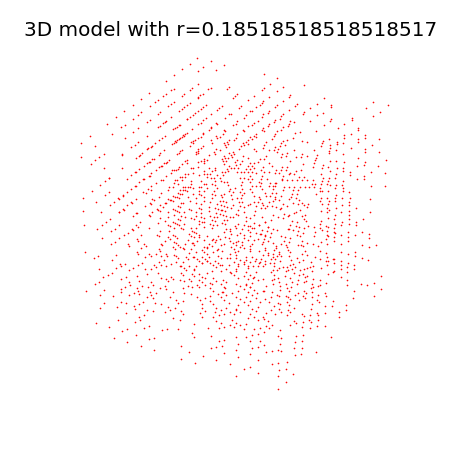

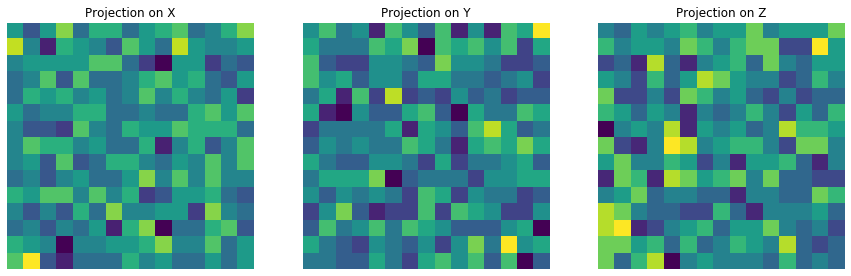

In [2]:
%matplotlib inline
# %matplotlib notebook

N = 15
C = 2 # Number of different neighbourhoods
r = R_3d[5]

game_map = init_map_3d(N,C)
x, y, z, c, proj_x, proj_y, proj_z = prepare_3d_plot(game_map, projections=True)

# Plot 3D cube to check 
plot_3d(x, y, z, c, r, figsize=(8, 8))

# If we increase N size of cube becomes to big to visialize it properly, 
# so projections are more reliable. Also notice, that in the beginnig cells are almost evenly distributed.
# Plot projections
plot_projections(proj_x, proj_y, proj_z)

Now let's start the 3D game and see, how distrubutions are changing

In [ ]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline

N = 15
C = 2 # Number of different neighbourhoods
game_length = 80
projective=True

r = R_3d[4]

final_map, moved = game_3d(N, C, r, game_length, create_gif=True, proj=False, device="cpu")

Let's look at the number of moving cells

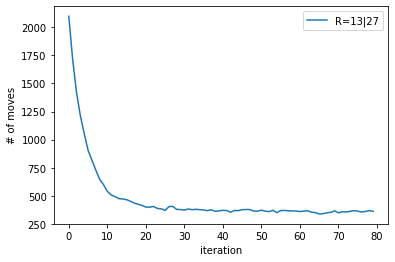

In [13]:
fig, ax = plt.subplots()
# fig.figure(figsize=(14,11))
ax.plot(moved, label=f'R={int(r*27)}|27')
ax.set_xlabel('iteration')
ax.set_ylabel('# of moves')
ax.legend()
plt.savefig(f'imgs/{fname}.png')

### Generate GIFs for different R values
#### First: Find values of R, when something interesting happens.

In [15]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline
R_3d = [i / 27 for i in range(27)]
N = 10
C = 2 # Number of different neighbourhoods
game_length = 20
projective=True

In [ ]:
global_moved = []
for r in R_3d:
    fname=f'tmp/schelling_{projective}_{int(r*27)}_{N}_{game_length}'
    _, moved = game_3d(N, C, r, game_length, name=fname, proj=projective, figsize=(6, 6), fps=8, verbouse=False)
    global_moved.append(moved)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
# fig.figure(figsize=(14,11))
for i, r in enumerate(R_3d):
    ax.plot(global_moved[i], label=f'R={int(r*27)}|27')
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves')
    ax.legend()
# plt.plot(global_moved[0], label='r')

#### Let's take $R = 15$ and look how far will it get

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(moved_14[100:], label=f'R={int(r*8)}|8')
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('# of moves', fontsize=20)
ax.legend(fontsize=20)
plt.savefig(f'imgs/{fname}.png')